In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *


2024-04-15 15:52:12.070595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 15:52:12.070640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 15:52:12.071676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 15:52:12.077331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 15:52:12.747260: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-15 15:52:13.399513: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 15:52:13.435574: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 15:52:13.435759: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder(vectors)
tensors = tensor_gen(vectors)

/home/ucdasec/Faulthunter-RNN-approach/Utils/w2b_encoding_lw.py:78: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/home/ucdasec/Faulthunter-RNN-appr

In [3]:
model = model_ver_10(tensors[0][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 5/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 6/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 7/50
90/90 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 8/50
90/90 [==

In [7]:
y_pred = model.predict(tensors[2])

26/26 [==============================] - 0s 899us/step


In [8]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [9]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))


For secure:
f1 score:  0.08695652173913043
precision score:  0.0847457627118644
recall score:  0.08928571428571429

true_positives: 5
true_negetives: 706
false_positives: 54
false_negetives: 51

#########################################

For insecure:
f1 score:  0.930784442979565
precision score:  0.9326287978863936
recall score:  0.9289473684210526

true_positives: 706
true_negetives: 5
false_positives: 51
false_negetives: 54



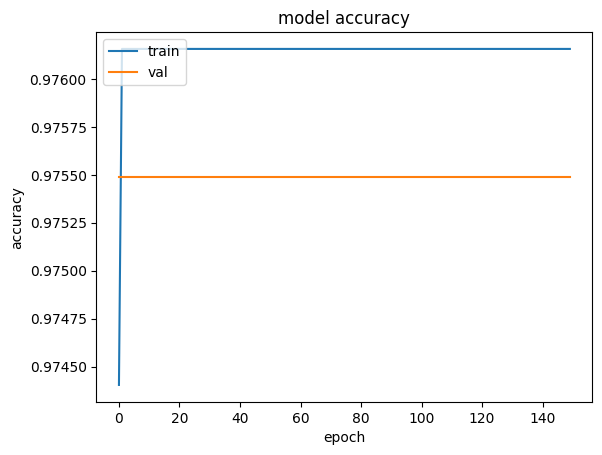

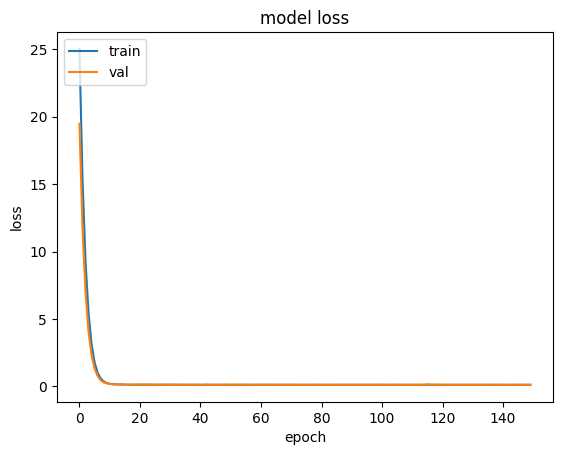

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!nvidia-smi

Wed Mar 20 12:57:30 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 28%   30C    P8     5W / 151W |   7694MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git pull

Updating f89c940..45f66d6
Fast-forward
 .vscode/launch.json                                |     16 +
 .../RNN_paper_prototype.cpython-310.pyc            |    Bin 2408 -> 2306 bytes
 Scripts/tester.ipynb                               | 250429 +-----------------
 Scripts/vec_playground.ipynb                       |    293 +-
 Utils/__pycache__/dataframe_gen.cpython-310.pyc    |    Bin 5447 -> 5505 bytes
 Utils/__pycache__/metrics_summary.cpython-310.pyc  |    Bin 0 -> 1373 bytes
 Utils/__pycache__/vector_gen.cpython-310.pyc       |    Bin 3093 -> 3517 bytes
 Utils/__pycache__/word2vec_gen.cpython-310.pyc     |    Bin 2604 -> 2604 bytes
 Utils/__pycache__/word2vec_ver2.cpython-310.pyc    |    Bin 0 -> 1566 bytes
 Utils/dataframe_gen.py                             |      9 +-
 Utils/vector_gen.py                                |     16 +-
 11 files changed, 708 insertions(+), 250055 deletions(-)
 create mode 100644 .vscode/launch.json
 create mode 100644 Utils/__pycache__/metrics_summary.